# Neptune API tour


## Introduction

This guide will show you how to:

* Install neptune-client
* Connect Neptune to your script and create the first run
* Log simple metrics to Neptune and explore the in the UI
* Log learning curves, images and model binaries from Keras training and see those in the Neptune app
* Fetch the data you logged to Neptune directly into your notebook and analyze them 

By the end of it, you will execute your first run and see it in Neptune!

## Before you start

This notebook example lets you try out Neptune as an anonymous user, with zero setup.

* If you are running the notebook on your local machine, you need to have [Python](https://www.python.org/downloads/) and [pip](https://pypi.org/project/pip/) installed.
* If you want to see the example recorded to your own workspace instead:
    * Create a Neptune account → [Take me to registration](https://neptune.ai/register)
    * Create a Neptune project that you will use for tracking metadata → [Tell me more about projects](https://docs.neptune.ai/administration/projects)

## Install Neptune and dependencies

In [1]:
! pip install neptune-client

  Using cached PyJWT-2.4.0-py3-none-any.whl (18 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Created wheel for neptune-client: filename=neptune_client-0.16.4-py2.py3-none-any.whl size=570565 sha256=5f24c26eb07942461dc6936ea5759ea7c3cc437ae54a984289a1fc85fbde571b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ce\d1\e6\5b685a63da87b081d65980daf95f82a4edea00834d83246054
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-py3-none-any.whl size=18149 sha256=1eb33950a0c89f3c99eefc3660c5c2f68ba75a1683d73a2071eb5493af8bc2d1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f3\1d\9f\2a74caecb81b8beb9a4fbe1754203d4b7cf42ef5d39e0d2311
Successfully built neptune-client strict-rfc3339


## Initialize Neptune

Connect your script to Neptune application and create new run.

In [2]:
import neptune.new as neptune

run = neptune.init(project="common/colab-test-run", api_token="ANONYMOUS")

https://app.neptune.ai/common/colab-test-run/e/COL-39943


Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/you-should-know/what-can-you-log-and-display#hardware-consumption


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


You tell Neptune: 

* **who you are**: your Neptune API token `api_token` 
* **where you want to send your data**: your Neptune `project`.

At this point you have new run in Neptune. For now on you will use `run` to log metadata to it.

---

**Note**


Instead of logging data to the public project 'common/colab-test-run' as an anonymous user 'neptuner' you can log it to your own project.

To do that:

1. Get your [Neptune API token](https://docs.neptune.ai/getting-started/installation#authentication-neptune-api-token)
2. Pass the token to ``api_token`` argument of ``neptune.init()`` method: ``api_token=YOUR_API_TOKEN``
3. Pass your project to the ``project`` argument of ``neptune.init()``.

For example:

```python
neptune.init(project="YOUR_WORKSPACE/YOUR_PROJECT", 
             api_token="YOUR_API_TOKEN")
```

## Basic Example

Lets start with something super simple.

You will:
* log parameters
* log a training and validation scores
* log loss
* add name to the run
* append two tags

In [4]:
params = {"learning_rate": 0.1}

# log params
run["parameters"] = params

# log name and append tags
run["sys/name"] = "basic-colab-example"
run["sys/tags"].add(["colab", "intro"])

# log loss during training
for epoch in range(1000):
    run["train/loss"].log(0.90 ** epoch)

# log train and validation scores
run["train/accuracy"] = 0.94
run["valid/accuracy"] = 0.92

Runs can be viewed as dictionary-like structures - **namespaces** - that you can define in your code. You can apply hierarchical structure to your metadata that will be reflected in the UI as well. Thanks to this you can easily organize your metadata in a way you feel is most convenient.

There is one special namespace: **system namespace**, denoted `sys`. You can use it to add name and tags to the run.

Try to change the values and re-execute to see your runs appear in the dashboard.

All `basic-colab-example` runs are grouped in [this dashboard view](https://app.neptune.ai/o/common/org/colab-test-run/experiments?viewId=2eb46477-0064-4617-a182-17f8a2fcc06a).

![colab-runs](https://neptune.ai/wp-content/uploads/docs-api-tour.png)

There are many other things that you can log to neptune:

* Images and charts
* Artifacts like model weights or results
* Text values
* Hardware consumption
* Code snapshots
* and more

You can go and see all that in the [documentation](https://docs.neptune.ai/user-guides/logging-and-managing-runs-results/logging-runs-data), and also check out the next example to see some of those.


**Stop logging**  

<font color=red>**Warning:**</font><br>
Once you are done logging, you should stop tracking the run using the `stop()` method.
This is needed only while logging from a notebook environment. While logging through a script, Neptune automatically stops tracking once the script has completed execution.

In [5]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/common/colab-test-run/e/COL-39943


## Keras classification example [Advanced]

Install and import your machine learning libraries

In [16]:
! pip install scikit-plot==0.3.7 
#tensorflow==2.4.1

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)

Get the data

In [6]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 3s 0us/step


Prepare the model

In [7]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

To log metrics after every batch and epoch let's create `NeptuneLogger` callback:

In [8]:
from tensorflow.keras.callbacks import Callback


class NeptuneLogger(Callback):
    def on_batch_end(self, batch, logs={}):
        for log_name, log_value in logs.items():
            run["batch/{}".format(log_name)].log(log_value)

    def on_epoch_end(self, epoch, logs={}):
        for log_name, log_value in logs.items():
            run["epoch/{}".format(log_name)].log(log_value)

Now we simply need to create a run.
I will tag it with the name `advanced` and log hyperparameters `epoch_nr` and `batch_size`: 

In [9]:
EPOCH_NR = 5
BATCH_SIZE = 32

run = neptune.init(project="common/colab-test-run", api_token="ANONYMOUS")

# log params
run["parameters/epoch_nr"] = EPOCH_NR
run["parameters/batch_size"] = BATCH_SIZE

# log name and append tag
run["sys/name"] = "keras-metrics"
run["sys/tags"].add("advanced")

https://app.neptune.ai/common/colab-test-run/e/COL-39944
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


Now we pass our `NeptuneLogger` as keras callback and thats it.

In [10]:
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=EPOCH_NR,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    callbacks=[NeptuneLogger()],
)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6382 - accuracy: 0.8359 - val_loss: 0.3453 - val_accuracy: 0.9090
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3442 - accuracy: 0.9027 - val_loss: 0.2788 - val_accuracy: 0.9240
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2899 - accuracy: 0.9175 - val_loss: 0.2432 - val_accuracy: 0.9319
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2558 - accuracy: 0.9273 - val_loss: 0.2198 - val_accuracy: 0.9386
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2307 - accuracy: 0.9345 - val_loss: 0.2007 - val_accuracy: 0.9442


You can click on the run link above and monitor your learning curves as it is training!

![advanced](https://neptune.ai/wp-content/uploads/docs-api-tour-2.png)

Great thing is, you can log more things if you need to during or after the training is finished.

For example, let's calculate some additional metrics on test data and log them.

In [11]:
import numpy as np

y_test_pred = np.asarray(model.predict(x_test))
y_test_pred_class = np.argmax(y_test_pred, axis=1)

In [12]:
from sklearn.metrics import f1_score

run["test/f1"] = f1_score(y_test, y_test_pred_class, average="micro")

We can log diagnostic charts like confusion matrix or ROC AUC curve.

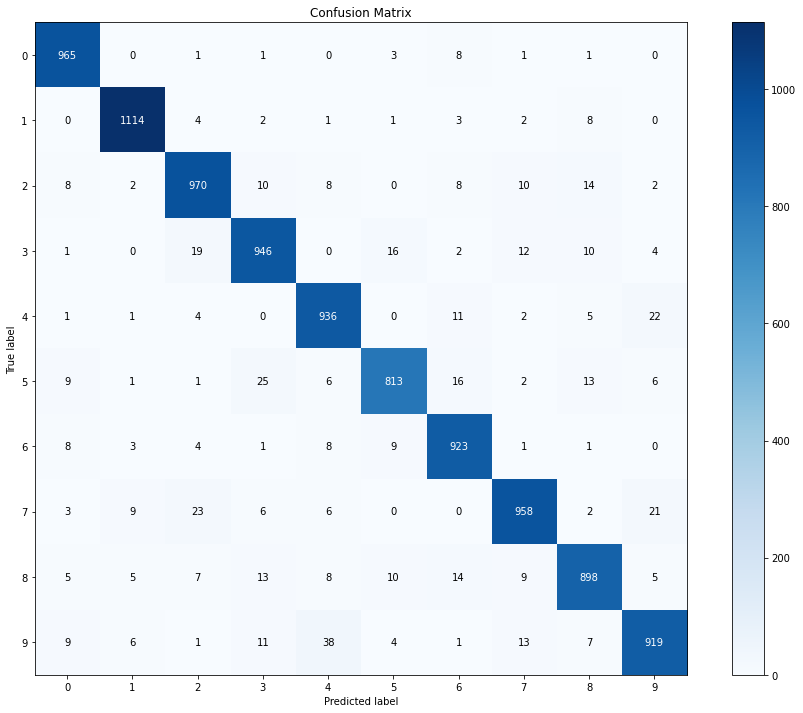

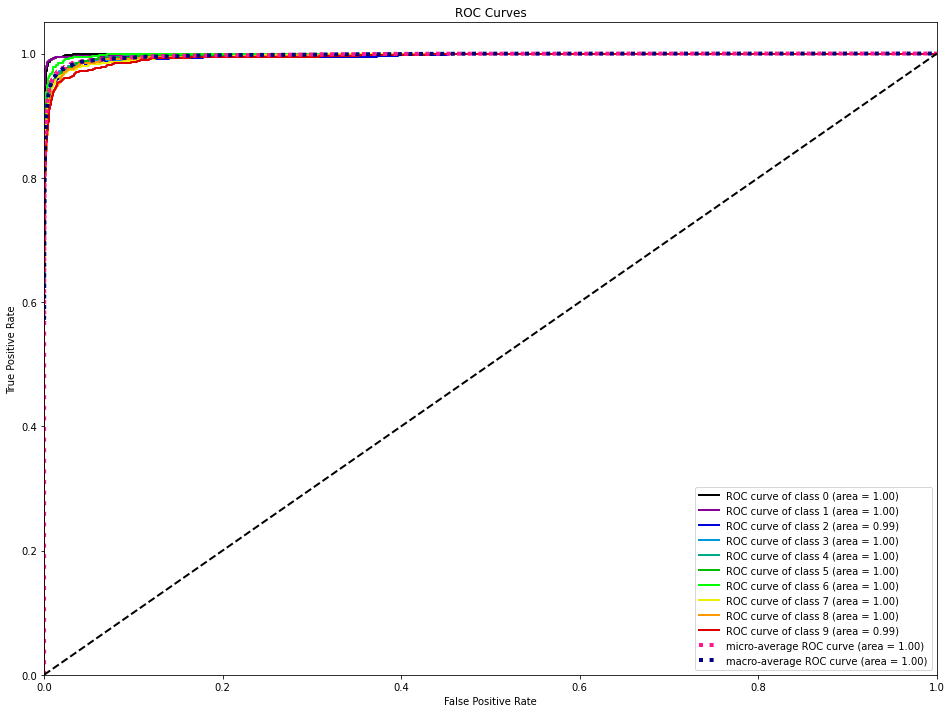

In [17]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

fig, ax = plt.subplots(figsize=(16, 12))
plot_confusion_matrix(y_test, y_test_pred_class, ax=ax)
run["diagnostic_charts"].log(neptune.types.File.as_image(fig))

fig, ax = plt.subplots(figsize=(16, 12))
plot_roc(y_test, y_test_pred, ax=ax)
run["diagnostic_charts"].log(neptune.types.File.as_image(fig))

![alt text](https://neptune.ai/wp-content/uploads/docs-api-tour-charts.png)

We can also log model weights to Neptune.

In [18]:
model.save("my_model.h5")
run["model"].upload("my_model.h5")

![alt text](https://neptune.ai/wp-content/uploads/docs-api-tour-model.png)

With that you can share models with your teammates easily.

You can play around and execute this run with different parameters and see results and compare them.

Like I've done here:

![alt text](https://neptune.ai/wp-content/uploads/docs-api-tour-compare.png)

A cool thing is, once things are logged to Neptune you can access them from wherever you want.
Let me show you. 



## Access data you logged programatically 

## Getting the project's leaderboard

You can use the project object to get aggregate data of all your runs. Here, fetch only runs with tag 'advanced'.

In [19]:
my_project = neptune.get_project(name="common/colab-test-run", api_token="ANONYMOUS")
run_df = my_project.fetch_runs_table(tag=["advanced"]).to_pandas()
run_df.head()

https://app.neptune.ai/common/colab-test-run/
Remember to stop your project once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/project#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


,sys/creation_time,sys/description,sys/failed,sys/hostname,sys/id,sys/modification_time,sys/monitoring_time,sys/name,sys/owner,sys/ping_time,...,train/accuracy,train/loss,valid/accuracy,monitoring/cpu,monitoring/gpu,monitoring/gpu_memory,monitoring/memory,monitoring/stderr,monitoring/stdout,monitoring/traceback
0,2022-07-17 12:52:24.388000+00:00,,False,Hari-SPECTRE,COL-39944,2022-07-17 12:59:17.727000+00:00,413,keras-metrics,neptuner,2022-07-17 12:59:17.727000+00:00,...,NaN,NaN,NaN,100.0,NaN,NaN,6.903717,\n,\n,NaN
1,2022-07-16 09:35:26.414000+00:00,,False,c805c6a62061,COL-39941,2022-07-16 09:40:18.074000+00:00,292,keras-metrics,neptuner,2022-07-16 09:40:18.074000+00:00,...,NaN,NaN,NaN,1.6,NaN,NaN,2.172085,NaN,"Shutting down background jobs, please wait a m...",NaN
2,2022-07-15 05:25:20.053000+00:00,,False,Mac-1657862513750.local,COL-39938,2022-07-15 05:26:20.213000+00:00,60,keras-metrics,neptuner,2022-07-15 05:26:20.213000+00:00,...,NaN,NaN,NaN,67.3,NaN,NaN,3.318405,NaN,"Shutting down background jobs, please wait a m...",NaN
3,2022-07-15 05:18:16.723000+00:00,,False,fv-az139-884,COL-39936,2022-07-15 05:18:44.200000+00:00,28,keras-metrics,neptuner,2022-07-15 05:18:44.200000+00:00,...,NaN,NaN,NaN,67.9,NaN,NaN,1.519440,NaN,"Shutting down background jobs, please wait a m...",NaN
4,2022-07-15 05:16:50.079000+00:00,,False,fv-az180-324,COL-39934,2022-07-15 05:17:22.276000+00:00,32,keras-metrics,neptuner,2022-07-15 05:17:22.276000+00:00,...,NaN,NaN,NaN,20.9,NaN,NaN,1.630077,NaN,"Shutting down background jobs, please wait a m...",NaN


**Stop logging** 

<font color=red>**Warning:**</font><br>
Once you are done logging, you should stop tracking the run using the `stop()` method.
This is needed only while logging from a notebook environment. While logging through a script, Neptune automatically stops tracking once the script has completed execution.

In [20]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.
All 1 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/common/colab-test-run/e/COL-39944


## Getting the run's metadata

Neptune lets you fetch whatever you logged to it directly to your notebooks and scripts.

In [21]:
run = neptune.init(project="common/colab-test-run", api_token="ANONYMOUS", run="COL-7")

https://app.neptune.ai/common/colab-test-run/e/COL-7
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


Now that your run is *fetched* you can download the metadata.

In [22]:
batch_size = run["parameters/batch_size"].fetch()
last_batch_acc = run["batch/accuracy"].fetch_last()
print("batch_size: {}".format(batch_size))
print("last_batch_acc: {}".format(last_batch_acc))

batch_size: 64.0
last_batch_acc: 0.9563500285148621


You can even download artifacts from that run if you want to:



In [23]:
run["model"].download()

In [24]:
! ls./

'ls.' is not recognized as an internal or external command,
operable program or batch file.


## Learn more about Neptune

Read about other Neptune features, create your free account and start logging!

[Go to Neptune](https://neptune.ai/register)